In [106]:
import os
import json
import pandas as pd

base_path =r"C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\transaction\country\india\state"

rows = []

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                file_path = os.path.join(year_path, file)

                with open(file_path, "r") as f:
                    data = json.load(f)

                    if data["data"] and "transactionData" in data["data"]:
                        for item in data["data"]["transactionData"]:
                            rows.append([
                                state,
                                year,
                                file.split(".")[0],
                                item["name"],
                                item["paymentInstruments"][0]["count"],
                                item["paymentInstruments"][0]["amount"]
                            ])

df_transaction = pd.DataFrame(rows, columns=[
    "State","Year","Quarter",
    "Transaction_Type","Count","Amount"
])

df_transaction.head()

,State,Year,Quarter,Transaction_Type,Count,Amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


In [107]:
df_transaction["State"].nunique()

36

In [108]:
df_transaction.columns

Index(['State', 'Year', 'Quarter', 'Transaction_Type', 'Count', 'Amount'], dtype='object')

In [109]:
df_transaction["State"].unique()

array(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'], dtype=object)

In [110]:
df_transaction.shape

(5034, 6)

In [111]:
df_transaction.info()
df_transaction.describe()
df_transaction["state"].nunique()
df_transaction.groupby("state")["amount"].sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             5034 non-null   object 
 1   Year              5034 non-null   object 
 2   Quarter           5034 non-null   object 
 3   Transaction_Type  5034 non-null   object 
 4   Count             5034 non-null   int64  
 5   Amount            5034 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 236.1+ KB


KeyError: 'state'

In [ ]:
#The Transaction Dataset was successfully loaded into a Dataframe.
#The dataset contains records from 36 states and union territories, confirming that the data extraction process is complete and correct.

#This Validation ensure the dataset is ready for SQL analysis and visualization

In [112]:
import sqlite3

conn = sqlite3.connect("phonepe.db")

In [113]:
df_transaction.to_sql("aggregated_transaction",conn,if_exists="replace",index=False)

5034

In [114]:
pd.read_sql("SELECT COUNT(*) FROM aggregated_transaction",conn)

,COUNT(*)
0,5034


In [115]:
query = """
SELECT State,
       SUM(Amount) as Total_Amount
FROM aggregated_transaction
GROUP BY State
ORDER BY Total_Amount DESC;
"""

df_state = pd.read_sql(query, conn)
df_state.head()

,State,Total_Amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra-pradesh,3.466908e+13
4,uttar-pradesh,2.688521e+13


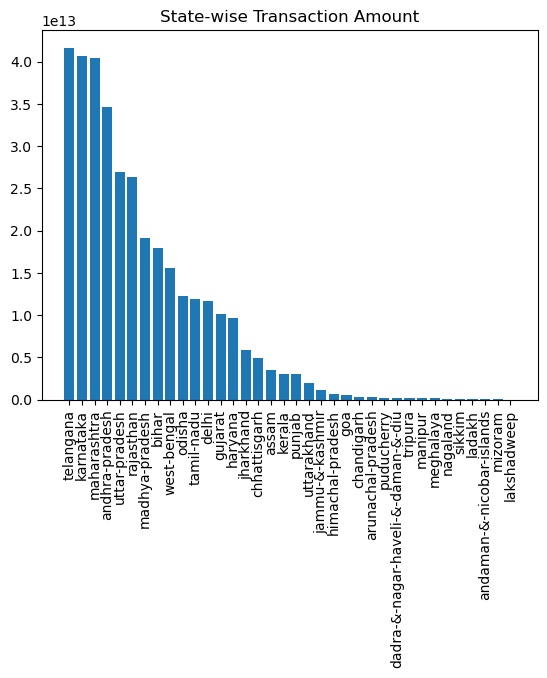

Index(['State', 'Total_Amount'], dtype='object')

In [116]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_state["State"], 
df_state["Total_Amount"])
plt.xticks(rotation=90)
plt.title("State-wise Transaction Amount")
plt.show()

df_state.columns

In [117]:
#State-wise Transaction Analysis — Note
#This analysis calculates the total transaction amount for each state using aggregated transaction data.
#The SQL query groups transactions by state and sums the transaction amount to identify top-performing regions.
#The bar chart visualization helps compare transaction volumes across all states and highlights regions with high digital payment activity.
#This supports business decisions related to market expansion, regional marketing strategies, and resource allocation.

In [118]:
df_transaction.columns

Index(['State', 'Year', 'Quarter', 'Transaction_Type', 'Count', 'Amount'], dtype='object')

In [119]:
df_transaction["Quarter"].unique()

array(['1', '2', '3', '4'], dtype=object)

In [120]:
#Transaction Category Performance

In [121]:
query = """
SELECT Transaction_Type,
       SUM(Amount) as Total_Amount
FROM aggregated_transaction
GROUP BY Transaction_Type
ORDER BY Total_Amount DESC;
"""

In [122]:
df_category = pd.read_sql(query,conn)
df_category

,Transaction_Type,Total_Amount
0,Peer-to-peer payments,2.665274e+14
1,Merchant payments,6.533988e+13
2,Recharge & bill payments,1.333876e+13
3,Others,1.742807e+11
4,Financial Services,1.420188e+11


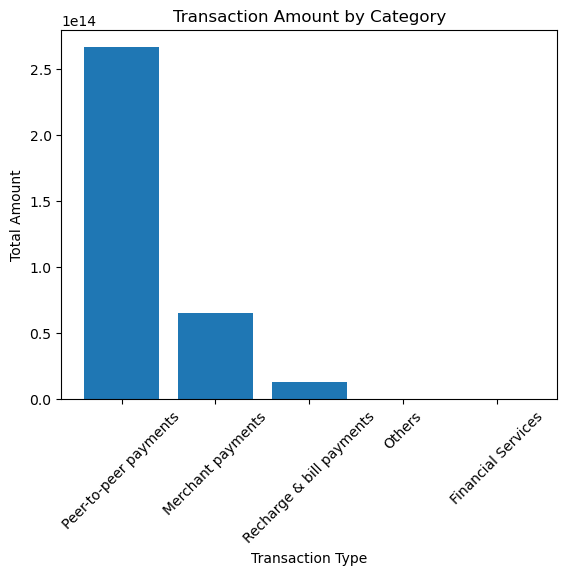

In [123]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_category["Transaction_Type"],df_category["Total_Amount"])
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Transaction Amount by Category")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Transaction Category Analysis — Note

#This analysis calculates the total transaction amount for each payment category.

#The SQL query groups transactions by Transaction_Type and sums the Amount
#to identify which payment category contributes the highest transaction value.

#The bar chart visualization helps compare transaction categories and
#understand user payment behavior patterns on PhonePe.

In [124]:
query = """
SELECT Year, Quarter,
SUM(Amount) AS Total_Amount
FROM aggregated_transaction
GROUP BY Year, Quarter
ORDER BY Year, Quarter;
"""

In [125]:
df_trend = pd.read_sql(query, conn)
df_trend.head()

,Year,Quarter,Total_Amount
0,2018,1,1.718334e+11
1,2018,2,3.043742e+11
2,2018,3,4.751015e+11
3,2018,4,6.717362e+11
4,2019,1,9.900214e+11


In [126]:
df_trend.columns

Index(['Year', 'Quarter', 'Total_Amount'], dtype='object')

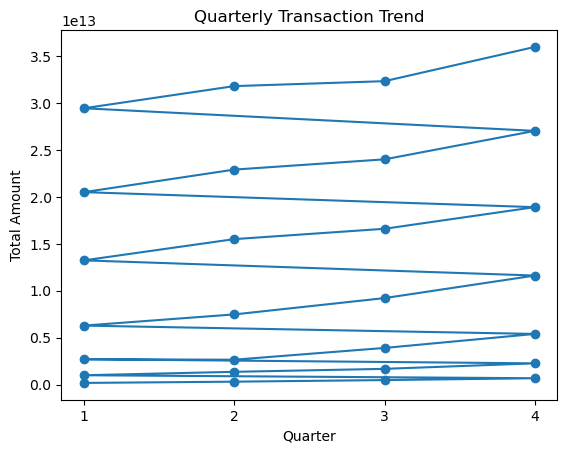

In [127]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_trend["Quarter"], df_trend["Total_Amount"], marker='o')
plt.title("Quarterly Transaction Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Amount")
plt.show()

In [ ]:
# Quarterly Transaction Trend — Note

#This analysis tracks transaction growth across quarters.
#The SQL query groups transaction data by Year and Quarter
#and calculates total transaction amount.

#The line chart helps visualize transaction growth patterns
#and seasonal trends in digital payments.

In [128]:
query = """
SELECT year, quarter,
SUM(Amount) AS total_amount
FROM aggregated_transaction
GROUP BY year, quarter
ORDER BY year, quarter;
"""

In [129]:
import pandas as pd

import sqlite3

conn = sqlite3.connect("phonepe.db")

df_trend = pd.read_sql(query, conn)
df_trend.head

<bound method NDFrame.head of     Year Quarter  total_amount
0   2018       1  1.718334e+11
1   2018       2  3.043742e+11
2   2018       3  4.751015e+11
3   2018       4  6.717362e+11
4   2019       1  9.900214e+11
5   2019       2  1.354214e+12
6   2019       3  1.672559e+12
7   2019       4  2.259894e+12
8   2020       1  2.697112e+12
9   2020       2  2.646145e+12
10  2020       3  3.902053e+12
11  2020       4  5.395851e+12
12  2021       1  6.284243e+12
13  2021       2  7.476466e+12
14  2021       3  9.216696e+12
15  2021       4  1.162129e+13
16  2022       1  1.323963e+13
17  2022       2  1.550419e+13
18  2022       3  1.660763e+13
19  2022       4  1.891489e+13
20  2023       1  2.051396e+13
21  2023       2  2.291849e+13
22  2023       3  2.401213e+13
23  2023       4  2.704723e+13
24  2024       1  2.945843e+13
25  2024       2  3.182035e+13
26  2024       3  3.234697e+13
27  2024       4  3.599880e+13>

In [130]:
import os
import json
import pandas as pd

base_path =r"C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state"

rows = []

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            with open(file_path, "r") as f:
                data = json.load(f)

                if data.get("data") and data["data"].get("usersByDevice"):
                    for item in data["data"]["usersByDevice"]:
                        rows.append([
                            state,
                            year,
                            file.split(".")[0],
                            item["brand"],
                            item["count"],
                            item["percentage"]
                        ])

In [131]:
df_user = pd.DataFrame(rows, columns=[
    "State","Year","Quarter",
    "Brand","User_Count","Percentage"
])


In [132]:
print(df_user.head(10))

                       State  Year Quarter     Brand  User_Count  Percentage
0  andaman-&-nicobar-islands  2018       1    Xiaomi        1665    0.247033
1  andaman-&-nicobar-islands  2018       1   Samsung        1445    0.214392
2  andaman-&-nicobar-islands  2018       1      Vivo         982    0.145697
3  andaman-&-nicobar-islands  2018       1      Oppo         501    0.074332
4  andaman-&-nicobar-islands  2018       1   OnePlus         332    0.049258
5  andaman-&-nicobar-islands  2018       1    Realme         316    0.046884
6  andaman-&-nicobar-islands  2018       1     Apple         229    0.033976
7  andaman-&-nicobar-islands  2018       1  Motorola         226    0.033531
8  andaman-&-nicobar-islands  2018       1    Lenovo         202    0.029970
9  andaman-&-nicobar-islands  2018       1    Huawei         158    0.023442


In [133]:
print(os.listdir(base_path))

['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh', 'uttarakhand', 'west-bengal']


In [134]:
print(state_path)
print(os.listdir(state_path))

C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state\west-bengal
['2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [135]:
print(year_path)
print(os.listdir(year_path))

C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state\west-bengal\2024
['1.json', '2.json', '3.json', '4.json']


In [136]:
query = """
SELECT Brand,
SUM(User_Count) AS Total_Users
FROM aggregated_user
GROUP BY Brand
ORDER BY Total_Users DESC;
"""

df_device = pd.read_sql(query, conn)
df_device

,Brand,Total_Users
0,Xiaomi,869562617
1,Samsung,671603711
2,Vivo,625415019
3,Oppo,420250245
4,Others,282950234
5,Realme,219973222
6,Apple,95947314
7,Motorola,73340734
8,OnePlus,63677211
9,Huawei,57129693


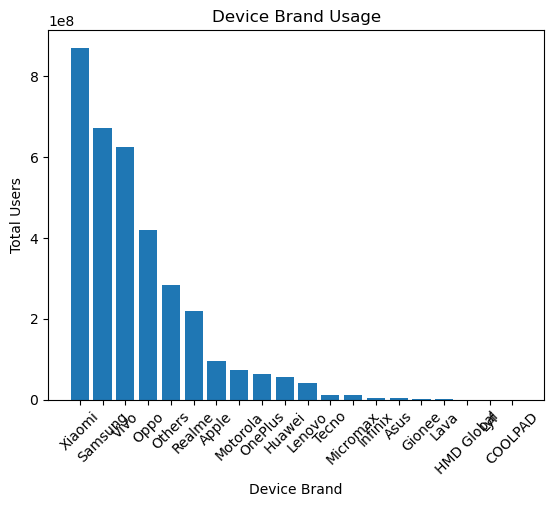

In [137]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_device["Brand"], df_device["Total_Users"])
plt.xticks(rotation=45)
plt.title("Device Brand Usage")
plt.xlabel("Device Brand")
plt.ylabel("Total Users")
plt.show()

In [138]:
query = """
SELECT Quarter,
SUM(User_Count) AS Total_Users
FROM aggregated_user
GROUP BY Quarter
ORDER BY Quarter;
"""

In [139]:
df_trend = pd.read_sql(query, conn)
df_trend

,Quarter,Total_Users
0,1,1025819438
1,2,729708360
2,3,808826660
3,4,895970734


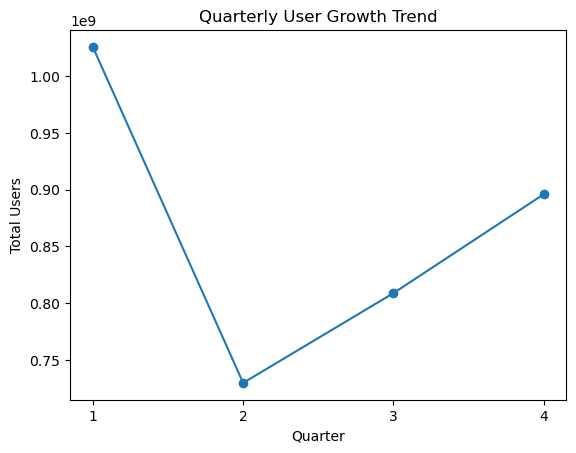

In [140]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_trend["Quarter"], df_trend["Total_Users"], marker="o")
plt.xlabel("Quarter")
plt.ylabel("Total Users")
plt.title("Quarterly User Growth Trend")
plt.show()

In [ ]:
#Quarterly User Trend Analysis
#This analysis calculates total users for each quarter.
#It helps understand user growth patterns over time and seasonal adoption trends.
#This insight supports product strategy and marketing planning.

In [141]:
query = """
SELECT State,
SUM(User_Count) AS Total_Users
FROM aggregated_user
GROUP BY State
ORDER BY Total_Users DESC;
"""

In [142]:
df_state_user = pd.read_sql(query, conn)
df_state_user.head()

,State,Total_Users
0,maharashtra,452075011
1,uttar-pradesh,355969633
2,karnataka,291372780
3,andhra-pradesh,225414835
4,rajasthan,215645588


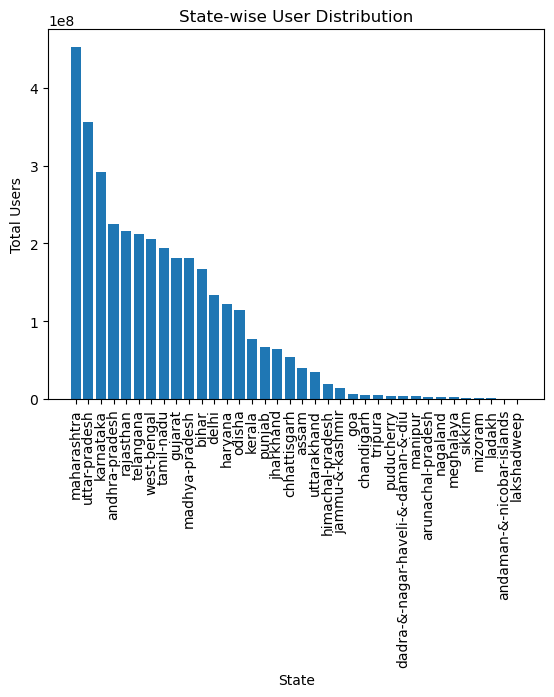

In [143]:

import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_state_user["State"], df_state_user["Total_Users"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Users")
plt.title("State-wise User Distribution")
plt.show()

In [ ]:
#State-wise User Analysis
#This analysis calculates total users in each state.
#It helps identify regions with high user adoption.
#This insight supports regional expansion strategy and targeted marketing.

In [144]:
import os, json
import pandas as pd

rows = []

base_path = r"C:\Users\User\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\insurance\country\india\state"

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            with open(file_path, "r") as f:
                data = json.load(f)

            if data.get("data") and data["data"].get("transactionData"):
                for item in data["data"]["transactionData"]:
                    rows.append([
                        state,
                        year,
                        file.split(".")[0],
                        item["name"],
                        item["paymentInstruments"][0]["count"],
                        item["paymentInstruments"][0]["amount"]
                    ])

df_insurance = pd.DataFrame(rows, columns=[
    "State","Year","Quarter","Insurance_Type","Count","Amount"
])

In [145]:
query = """
SELECT State,
SUM(Amount) AS Total_Insurance
FROM aggregated_insurance
GROUP BY State
ORDER BY Total_Insurance DESC;
"""

In [146]:
df_insurance.shape

(682, 6)

In [147]:
import pandas as pd

import sqlite3

conn = sqlite3.connect("phonepe.db")

df_insurance.to_sql("aggregated_insurance", conn, if_exists="replace", index=False)

682

In [148]:
df_insurance = pd.read_sql(query, conn)
df_insurance.head()

,State,Total_Insurance
0,karnataka,2.743155e+09
1,maharashtra,2.363129e+09
2,uttar-pradesh,1.740346e+09
3,tamil-nadu,1.555507e+09
4,kerala,1.313719e+09


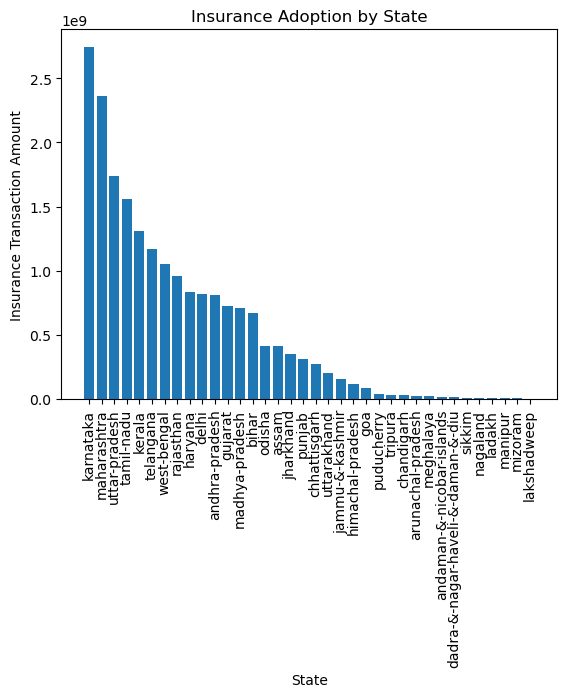

In [149]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_insurance["State"], df_insurance["Total_Insurance"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Insurance Transaction Amount")
plt.title("Insurance Adoption by State")
plt.show()

In [150]:
print(df_transaction.shape)
print(df_user.shape)
print(df_insurance.shape)

(5034, 6)
(6732, 6)
(36, 2)


In [151]:
%who

base_path	 col1	 col2	 conn	 cursor	 data	 df	 df_category	 df_check	 
df_device	 df_insurance	 df_state	 df_state_user	 df_transaction	 df_trend	 df_user	 f	 fig_bar	 
fig_pie	 fig_state	 file	 file_path	 filtered_df	 item	 json	 mysql	 os	 
pd	 plt	 px	 query	 row	 rows	 sqlite3	 st	 state	 
state_df	 state_path	 transactions	 year	 year_path	 


In [152]:
conn.commit()

In [153]:
conn.close()

In [ ]:
###PhonePe Pulse Data Analysis Project
#This project extracts PhonePe Pulse data from JSON files, converts it into structured DataFrames, stores it in SQLite, and performs exploratory data analysis using visualizations.
#Key insights:
#Transaction volume varies significantly across states
#Xiaomi and Samsung dominate device usage
#User growth trends increase yearly
#Insurance adoption differs by region
###Tools used: Python, Pandas, SQLite, Matplotlib, JSON

In [154]:
df.info()
df.describe()
df["state"].nunique()
df.groupby("state")["amount"].sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             5034 non-null   object 
 1   year              5034 non-null   int64  
 2   quarter           5034 non-null   int64  
 3   transaction_type  5034 non-null   object 
 4   count             5034 non-null   int64  
 5   amount            5034 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 236.1+ KB


state
telangana                             4.165596e+13
karnataka                             4.067872e+13
maharashtra                           4.037420e+13
andhra-pradesh                        3.466908e+13
uttar-pradesh                         2.688521e+13
rajasthan                             2.634324e+13
madhya-pradesh                        1.912528e+13
bihar                                 1.790135e+13
west-bengal                           1.558416e+13
odisha                                1.226398e+13
tamil-nadu                            1.193622e+13
delhi                                 1.163752e+13
gujarat                               1.019291e+13
haryana                               9.645037e+12
jharkhand                             5.906646e+12
chhattisgarh                          4.890472e+12
assam                                 3.460792e+12
kerala                                3.076269e+12
punjab                                2.983078e+12
uttarakhand              

In [155]:
import mysql.connector

conn=mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123"
)
print("Connected successfully!")

Connected successfully!


In [156]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123"
)

cursor = conn.cursor()

cursor.execute("CREATE DATABASE IF NOT EXISTS phonepe")
print("Database created!")

conn.close()

Database created!


In [157]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123",
    database="phonepe"
)

cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS transactions (
    state VARCHAR(50),
    year INT,
    quarter INT,
    transaction_type VARCHAR(50),
    count BIGINT,
    amount DOUBLE
)
""")

print("Table created!")

conn.close()

Table created!


In [158]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123",
    database="phonepe"
)

cursor = conn.cursor()

for _, row in df_transaction.iterrows():
    cursor.execute("""
        INSERT INTO transactions
        VALUES (%s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
print("Data inserted!")

conn.close()

Data inserted!


In [ ]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123",
    database="phonepe"
)

df_check = pd.read_sql("SELECT * FROM transactions LIMIT 5", conn)
df_check

In [159]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mani123",
    database="phonepe"
)

cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS users (
    state VARCHAR(50),
    year INT,
    quarter INT,
    brand VARCHAR(50),
    count BIGINT,
    percentage DOUBLE
)
""")

conn.commit()
print("Users table created!")

Users table created!


In [160]:
for _, row in df_user.iterrows():
    cursor.execute("""
        INSERT INTO users
        VALUES (%s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
print("Users data inserted!")

Users data inserted!


In [161]:
cursor.execute("DROP TABLE IF EXISTS insurance")

cursor.execute("""
CREATE TABLE insurance (
    state VARCHAR(50),
    total_insurance DOUBLE
)
""")

conn.commit()

In [162]:
for _, row in df_insurance.iterrows():
    cursor.execute("""
        INSERT INTO insurance (state, total_insurance)
        VALUES (%s, %s)
    """, (
        row["State"],
        row["Total_Insurance"]
    ))

conn.commit()
print("Insurance data inserted!")

Insurance data inserted!


In [10]:
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(layout="wide")

st.title("PhonePe Analytics Dashboard")

# Sidebar dataset selector
dataset = st.sidebar.selectbox(
    "Select Dataset",
    ["Transactions", "Users", "Insurance"]
)

# ---------------- TRANSACTIONS ----------------
if dataset == "Transactions":
    df = pd.read_csv("transactions.csv")

    st.header("Transactions Dashboard")
    st.dataframe(df)

    fig = px.bar(df, x=df.columns[0], y=df.columns[-1], title="Transactions Overview")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- USERS ----------------
elif dataset == "Users":
    df = pd.read_csv("users.csv")

    st.header("Users Dashboard")
    st.dataframe(df)

    fig = px.bar(df, x=df.columns[0], y=df.columns[-1], title="Users Overview")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- INSURANCE ----------------
elif dataset == "Insurance":
    df = pd.read_csv("insurance.csv")

    st.header("Insurance Dashboard")
    st.dataframe(df)

    fig = px.bar(df, x=df.columns[0], y=df.columns[-1], title="Insurance Overview")
    st.plotly_chart(fig, use_container_width=True)

2026-02-11 17:37:37.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:37.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [11]:
import pandas as pd
import streamlit as st

st.title("PhonePe Analytics Dashboard")

transactions = pd.read_csv("transactions.csv")
user = pd.read_csv("user.csv")
insurance = pd.read_csv("insurance.csv")

st.write("Transactions", transactions.head())
st.write("User", user.head())
st.write("Insurance", insurance.head())

2026-02-11 17:37:48.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:48.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:48.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:49.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:49.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:49.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:49.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:37:49.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [12]:
import os
st.write(os.listdir())

2026-02-11 17:51:49.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-11 17:51:49.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
